In [1]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [2]:
def get_data(path):
    df = pd.read_excel(path)
#     print(list(df.columns))
    cols = list(df.columns)
    col_x = cols[1:-1]
    col_y = cols[-1]
    mu = df[col_x].mean(axis=0)
    std = df[col_x].std(axis=0)
    df[col_x] = (df[col_x]-mu)/std
#     print(col_x)
#     print(col_y)
    X = df[col_x].values
    y = df[col_y].values
    
    return X,y

## Manual train test split for holdout Cross validation

In [3]:
path = r"C:\Users\gprak\Downloads\BITS Courses\CS F464 Machine Learning I\data\data5.xlsx"
X,Y = get_data(path)
X,Y = shuffle(X,Y)
train_split = 0.6
split_idx = int(train_split*len(X))
X_train = X[:split_idx]
Y_train = Y[:split_idx]
X_test = X[split_idx:]
Y_test = Y[split_idx:]


## Contains sigmoid activation at 2 hidden layer multilayer perceptron

In [4]:
def forward(X,W1,b1,W2,b2):
#     Z = X.dot(W1)+b1
#     Z = Z*(Z>0)
    Z = 1/(1+np.exp(-(X.dot(W1)+b1)))
    activation = Z.dot(W2)+b2
    Y = 1/(1+np.exp(-activation))
    return Y,Z

def predict(X,W1,b1,W2,b2):
    Y,_ = forward(X,W1,b1,W2,b2)
    return np.round(Y)

def derivative_w2(Z,T,Y):
    return (T-Y).dot(Z)

def derivative_b2(T,Y):
    return (T-Y).sum()

def derivative_w1(X,Z,T,Y,W2):
#     dZ = np.outer(T-Y,W2)*(Z>0)
    dZ = np.outer(T-Y,W2)*Z*(1-Z)
    return X.T.dot(dZ)

def derivative_b1(Z,T,Y,W2):
    dZ = np.outer(T-Y,W2)*Z*(1-Z)
#     dZ = np.outer(T-Y,W2)*(Z>0)
    return dZ.sum(axis=0)

def get_log_likelihood(T,Y):
    ll = np.sum(T*np.log(Y)+(1-T)*np.log(1-Y))
    if ll!=ll:ll=0
    return ll

def run_multilayer_perceptron(X,Y,learning_rate=1e-2,iterations=3000,regularization=0.,verbose=True):
    N,D = X.shape
    K = len(set(Y))
    n_hidden = 8
    W1 = np.random.randn(D,n_hidden)
    b1 = np.random.randn(n_hidden)
    W2 = np.random.randn(n_hidden)
    b2 = np.random.randn(1)
    LL = []
    er = 0
    last_error_rate = None
    for i in range(iterations):
        pY, Z = forward(X,W1,b1,W2,b2)
        ll = get_log_likelihood(Y,pY)
       
        prediction = predict(X,W1,b1,W2,b2)
        er = np.abs(prediction-Y).mean()
        
        
        LL.append(ll)
        
        gW2 = derivative_w2(Z,Y,pY)
        gb2 = derivative_b2(Y,pY)
        gW1 = derivative_w1(X,Z,Y,pY,W2)
        gb1 = derivative_b1(Z,Y,pY,W2)
        
        W2+=learning_rate*(gW2-regularization*W2)
        b2+=learning_rate*(gb2-regularization*b2)
        W1+=learning_rate*(gW1-regularization*W1)
        b1+=learning_rate*(gb2-regularization*b1)
        
        if i%100==0 and verbose==True:
            print(f"i:{i}, ll:{ll}, train_classification_rate:{1-er}")
    if verbose==True:
        plt.plot(LL)
        plt.show()
    accuracy = 1-er
    return (LL,W1,b1,W2,b2,accuracy)

i:0, ll:-1347.7888488693247, train_classification_rate:0.4961180124223602
i:100, ll:-404.42326333233865, train_classification_rate:0.8680124223602484
i:200, ll:-332.6251317965034, train_classification_rate:0.8967391304347826
i:300, ll:-291.84595547580864, train_classification_rate:0.9169254658385093
i:400, ll:-264.3666842549675, train_classification_rate:0.922360248447205
i:500, ll:-243.4479022483875, train_classification_rate:0.9246894409937888
i:600, ll:-227.2012755422392, train_classification_rate:0.9316770186335404
i:700, ll:-211.93236518815212, train_classification_rate:0.9347826086956522
i:800, ll:-198.40832166877763, train_classification_rate:0.9386645962732919
i:900, ll:-185.21109837300656, train_classification_rate:0.9425465838509317
i:1000, ll:-172.684545561224, train_classification_rate:0.9472049689440993
i:1100, ll:-160.84166306941475, train_classification_rate:0.9565217391304348
i:1200, ll:-150.35368208901167, train_classification_rate:0.9619565217391304
i:1300, ll:-141.74

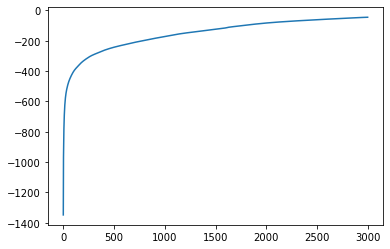

In [5]:
costs_history,W1,b1,W2,b2,accuracy = run_multilayer_perceptron(X_train,Y_train,learning_rate = 0.001,iterations = 3000,regularization=0.04)

In [6]:
prediction_test = predict(X_test,W1,b1,W2,b2)
er_test = np.abs(prediction_test-Y_test).mean()
print(f"test_classification_rate:{1-er_test}")


test_classification_rate:0.8906976744186046


## Manual train test split for k-fold Cross validation

In [7]:
K=500
X_data,Y_data = X.copy(),Y.copy()
N = len(X)
# print(N)
avg_classification_rate = []
for i in range(5):
    print(f"i={i}")
    X_train = np.concatenate((X_data[:i+K],X_data[i+K:]),axis=0)
    Y_train = np.concatenate((Y_data[:i+K],Y_data[i+K:]),axis=0)
    X_test = X_data[min(i+K,N-1)]
    Y_test = Y_data[min(i+K,N-1)]
#     print(f"len(X_train)={len(X_train)}")
#     print(f"len(X_test)={len(X_test)}")
#     print(f"X_train={X_train}")
#     print(f"X_test={X_test}")
#     print(f"Y_train={Y_train}")
#     print(f"Y_test={Y_test}")
    costs_history,W1,b1,W2,b2,accuracy = run_multilayer_perceptron(X_train,Y_train,learning_rate = 0.001,iterations = 3000,regularization=0.04,verbose=False)
    avg_classification_rate.append(accuracy)
avg_classification_rate = np.array(avg_classification_rate)
avg_classification_rate = avg_classification_rate.mean()
print(f"avg_classification_rate={avg_classification_rate}")

i=0
i=1
i=2
i=3
i=4
avg_classification_rate=0.996927374301676
